## Obtaining the Efficient Frontier- Part 1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

companies = ['WMT', 'FB']
df = pd.read_csv('Walmart_FB_2014_2017.csv', index_col='Date')

In [13]:
df.head()

,WMT,FB
Date,,
2013-12-31,71.126411,54.650002
2014-01-02,71.325287,54.709999
2014-01-03,71.090279,54.560001
2014-01-06,70.692558,57.200001
2014-01-07,70.909485,57.919998


In [ ]:
type(df.index)

In [16]:
df.index=pd.to_datetime(df.index)

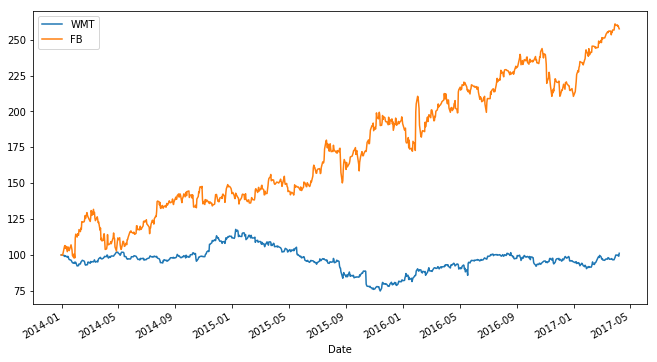

In [17]:
(df / df.iloc[0] * 100).plot(figsize=(11, 6))

## Calculate the logarithmic returns


In [18]:
log_returns = np.log(df/ df.shift(1))

In [20]:
log_returns.head()

,WMT,FB
Date,,
2013-12-31,NaN,NaN
2014-01-02,0.002792,0.001097
2014-01-03,-0.003300,-0.002745
2014-01-06,-0.005610,0.047253
2014-01-07,0.003064,0.012509


In [21]:
# Calculating Mean
log_returns.mean() * 250

WMT    0.003551
FB     0.287439
dtype: float64

In [22]:
#Calculating Covariance
log_returns.cov() * 250

,WMT,FB
WMT,0.031544,0.008777
FB,0.008777,0.082786


In [23]:
#Calculating Correlation
log_returns.corr()

,WMT,FB
WMT,1.000000,0.171746
FB,0.171746,1.000000


Create a variable that carries the number of assets in your portfolio.

In [27]:
num_assets = len(companies)

In [28]:
num_assets

2

The portfolio need not be equally weighted. So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [30]:
arr = np.random.random(2)
arr

array([0.85216426, 0.73407425])

In [31]:
arr[0]+arr[1]

1.5862385086575679

In [32]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.50354655, 0.49645345])

## Obtaining Markowitz Frontier- Part 2

Expected Portfolio Return

In [33]:
np.sum(weights * log_returns.mean())* 250

0.1444881608787945

Expected Portfolio Variance

In [34]:
# Expected Portfolio Variance
np.dot(weights.T,np.dot(log_returns.cov()* 250,weights))

0.032790341551572906

Expected Portfolio Volatility

In [35]:
# Expected Portfolio Volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights)))

0.18108103586950486

In [36]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov(),weights))))
    
portfolio_returns,portfolio_volatilities

([0.23902430167315575,
  0.18944123445616523,
  0.17196869286950392,
  0.006685968278870664,
  0.10990479521109868,
  0.16054894843385578,
  0.05824036464673471,
  0.215181628263505,
  0.2780682371520503,
  0.18729193595657573,
  0.17271604822735367,
  0.1636115801655414,
  0.12794174155284807,
  0.01249290607471217,
  0.07250592422643425,
  0.20991492017689484,
  0.13979037716301046,
  0.09211161986228816,
  0.13765751454800465,
  0.18910213916583757,
  0.0826287472413976,
  0.17548626855187446,
  0.23482998643606023,
  0.04977502420110538,
  0.12902758107764534,
  0.07148237416802192,
  0.20572806580943284,
  0.15286035265650189,
  0.26246526678464516,
  0.19205318052620118,
  0.15882208870368691,
  0.14039463252593345,
  0.06006665189983841,
  0.20189459375392035,
  0.12109478090406407,
  0.07986211496747846,
  0.28593726614458326,
  0.1526108362750218,
  0.20015147712679704,
  0.18161396487360454,
  0.10940568800377097,
  0.25770710803405306,
  0.028614081710863402,
  0.21241678934

In [37]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)
portfolio_returns,portfolio_volatilities

(array([0.2390243 , 0.18944123, 0.17196869, 0.00668597, 0.1099048 ,
        0.16054895, 0.05824036, 0.21518163, 0.27806824, 0.18729194,
        0.17271605, 0.16361158, 0.12794174, 0.01249291, 0.07250592,
        0.20991492, 0.13979038, 0.09211162, 0.13765751, 0.18910214,
        0.08262875, 0.17548627, 0.23482999, 0.04977502, 0.12902758,
        0.07148237, 0.20572807, 0.15286035, 0.26246527, 0.19205318,
        0.15882209, 0.14039463, 0.06006665, 0.20189459, 0.12109478,
        0.07986211, 0.28593727, 0.15261084, 0.20015148, 0.18161396,
        0.10940569, 0.25770711, 0.02861408, 0.21241679, 0.18253775,
        0.19472238, 0.12674706, 0.16290408, 0.19506096, 0.12189415,
        0.17456375, 0.24339411, 0.20517286, 0.20562258, 0.1807871 ,
        0.15753684, 0.04511083, 0.14570486, 0.12292448, 0.13974987,
        0.00435762, 0.20417156, 0.17877689, 0.25769413, 0.04446349,
        0.13165945, 0.06924839, 0.03088512, 0.28478665, 0.12669177,
        0.2450802 , 0.07410808, 0.13628399, 0.11

## Obtaining the Efficient Frontier in Python- Part 3

In [38]:
portfolios=pd.DataFrame({'Return': portfolio_returns,'Volatility':portfolio_volatilities})

In [40]:
portfolios.head()

,Return,Volatility
0,0.239024,0.015538
1,0.189441,0.013149
2,0.171969,0.012424
3,0.006686,0.011145
4,0.109905,0.010596


In [41]:
portfolios.tail()

,Return,Volatility
995,0.273539,0.017409
996,0.102647,0.010477
997,0.175654,0.012571
998,0.014974,0.010930
999,0.062073,0.010251


Text(0, 0.5, 'Expected Return')

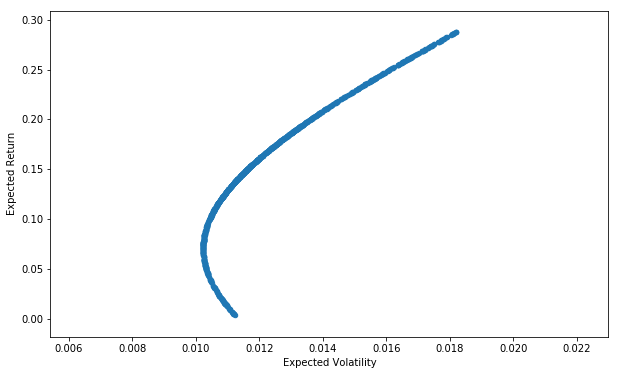

In [42]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')